In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index (1).csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

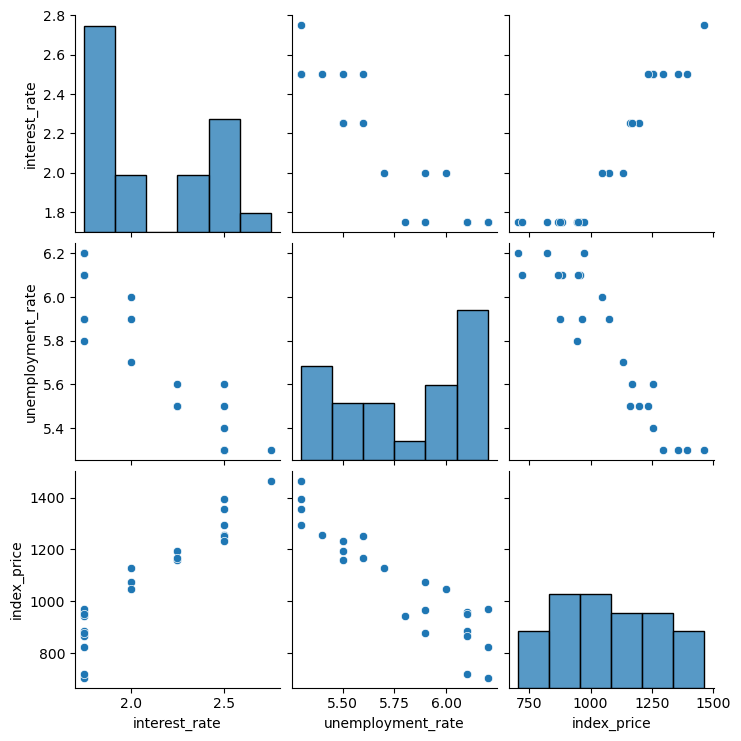

In [8]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


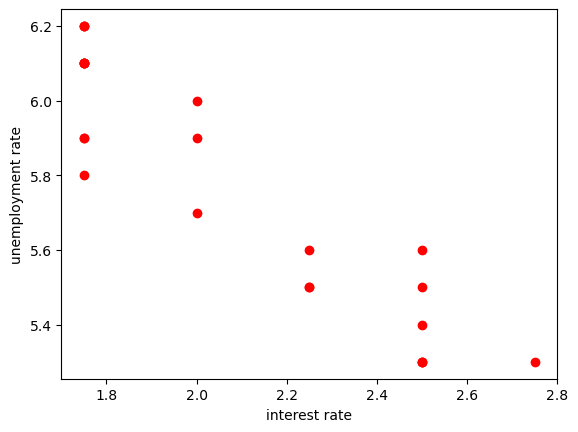

In [10]:
#visualize the datapoint more closly
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")
plt.show()

In [11]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,:-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
import seaborn as sns

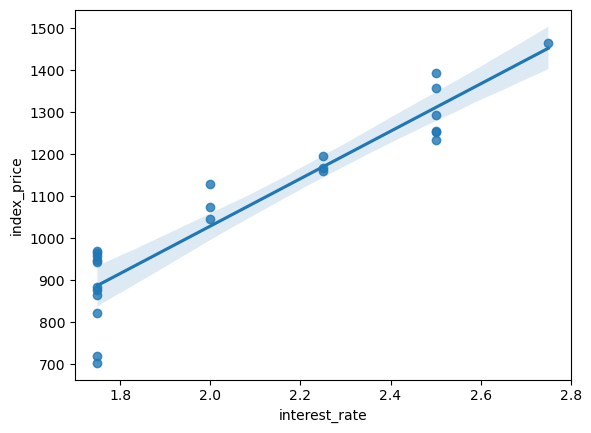

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.show()


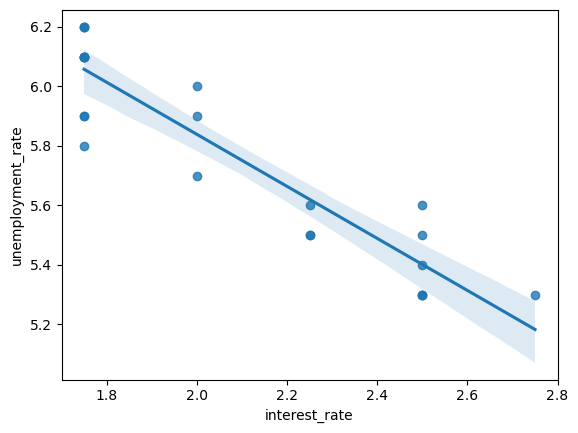

In [21]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df_index)
plt.show()

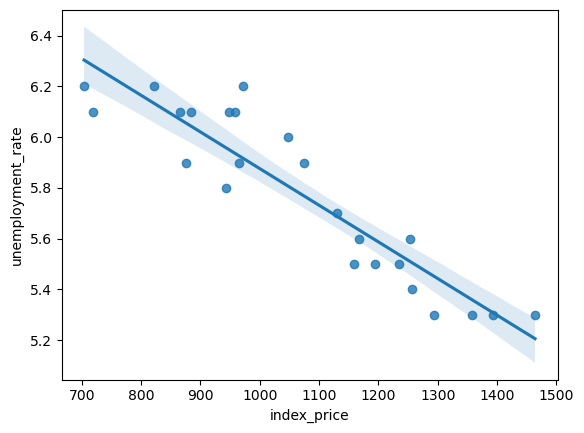

In [25]:
sns.regplot(x="index_price", y="unemployment_rate", data=df_index)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [33]:
np.mean(validation_score)

-1.314768175368353e-31

In [34]:
#prediction
y_pred=regression.predict(X_test)

In [35]:
y_pred

array([[2.17801361, 5.51314617],
       [1.6881814 , 6.20780415],
       [2.66784581, 5.31467246],
       [1.6881814 , 6.10856729],
       [1.9330975 , 5.91009358],
       [2.17801361, 5.61238302]])

In [36]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.0025008366637372143
0.040277777777777836
0.05000836593748304


In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9790504924562647
0.9650841540937746


#assumptions

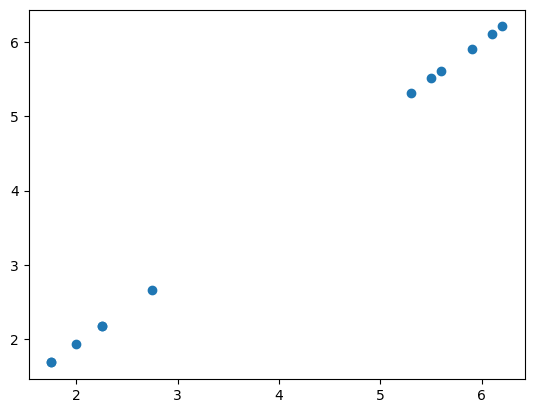

In [38]:
plt.scatter(y_test,y_pred)
plt.show()

In [39]:
residuals=y_test-y_pred
print(residuals)

    interest_rate  unemployment_rate
8        0.071986          -0.013146
16       0.061819          -0.007804
0        0.082154          -0.014672
18       0.061819          -0.008567
11       0.066902          -0.010094
9        0.071986          -0.012383


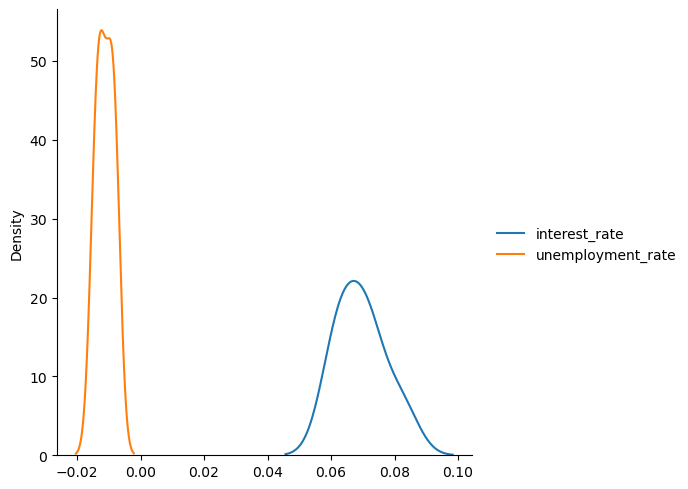

In [40]:
## Plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

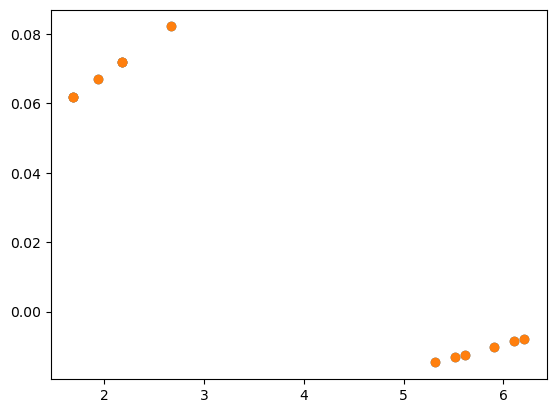

In [42]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

In [43]:
#ols linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [46]:
import statsmodels.api as sm

X = df_index[['interest_rate', 'unemployment_rate']]
y = df_index['index_price']

X = sm.add_constant(X)   # add intercept
model = sm.OLS(y, X).fit()   # fit the model

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           4.04e-11
Time:                        01:56:18   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

In [47]:
print(regression.coef_)

[[3.39070989e-01 7.85046229e-17]
 [0.00000000e+00 3.22413736e-01]]
